In [17]:
import pandas as pd
import numpy as np
import glob
import importlib
import pickle
import shap
import matplotlib.pyplot as plt

In [9]:
features = ['ht', 'aplanarity', 'sphericity', 'chargeEta', 'MET_met', 'deltaPhiTauMet', 'mt', 'mTauJet']

In [4]:
bdt = pickle.load(open("..//note_v0/bdt_rs5/bdt.pkl", "rb"))

In [6]:
bkg = pd.read_hdf("..//note_v0/bdt_rs5/QCD.h5")

In [7]:
signal = pd.read_hdf("..//note_v0/bdt_rs5/TTJets_signal.h5")

In [10]:
signal = signal[signal["train_flag"] == "test"][features]

In [11]:
bkg = bkg[bkg["train_flag"] == "test"][features]

In [12]:
X = pd.concat([signal[0:5000], bkg[0:5000]], axis=0)

In [13]:
explainer = shap.TreeExplainer(bdt)

In [14]:
shap_values = explainer.shap_values(X)

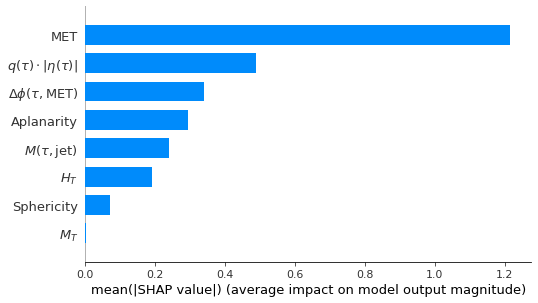

In [40]:
shap.summary_plot(shap_values, X,  plot_type="bar", feature_names=[r'$H_T$', 'Aplanarity', 'Sphericity', r'$q(\tau) \cdot |\eta(\tau)|$', 'MET', 
                                                                   r'$\Delta \phi( \tau, \mathrm{MET})$', r'$M_T$', r'$M(\tau, \mathrm{jet})$'],
                  show=False)
fig = plt.gcf()
fig.savefig("importance.pdf", bbox_inches="tight")

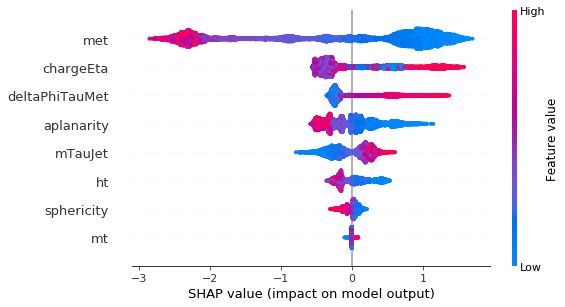

In [14]:
shap.summary_plot(shap_values, X)